House price prediction using advance regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",100)

In [2]:
# load train and test data
train = pd.read_csv("D:/kaggle/House Prices Advanced Regression Techniques/train.csv")
test = pd.read_csv("D:/kaggle/House Prices Advanced Regression Techniques/test.csv")
full = pd.concat([train,test], ignore_index=True)
train_id = train.Id
test_id = test.Id
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [3]:
# get features that has missing values
features_missing_cnt = full.isnull().sum()
missing_features = {col:cnt for col,cnt in zip(features_missing_cnt.index,features_missing_cnt.values) if cnt!=0}
missing_features

{'Alley': 2721,
 'BsmtCond': 82,
 'BsmtExposure': 82,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 79,
 'BsmtFinType2': 80,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 81,
 'BsmtUnfSF': 1,
 'Electrical': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 2348,
 'FireplaceQu': 1420,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'GarageCond': 159,
 'GarageFinish': 159,
 'GarageQual': 159,
 'GarageType': 157,
 'GarageYrBlt': 159,
 'KitchenQual': 1,
 'LotFrontage': 486,
 'MSZoning': 4,
 'MasVnrArea': 23,
 'MasVnrType': 24,
 'MiscFeature': 2814,
 'PoolQC': 2909,
 'SalePrice': 1459,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

In [4]:
# Sample basement records
full[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
1,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
2,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
3,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
4,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0


In [5]:
# missing basement record count
full[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1       1
BsmtFinType2    80
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In [6]:
full[full.TotalBsmtSF.isnull()|full.TotalBsmtSF==0][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].drop_duplicates()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2188,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [7]:
# missing basement record count
full[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isnull().sum()# Impute default values for zero or missing basement areas
_ = full.set_value((full.TotalBsmtSF.isnull()|(full.TotalBsmtSF==0)),
                   ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],
                   ['NA','NA','NA','NA',0,'NA',0,0,0,0,0]
                  )
_ = train.set_value((train.TotalBsmtSF.isnull()|(train.TotalBsmtSF==0)),
                   ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],
                   ['NA','NA','NA','NA',0,'NA',0,0,0,0,0]
                  )
_ = test.set_value((test.TotalBsmtSF.isnull()|(test.TotalBsmtSF==0)),
                   ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],
                   ['NA','NA','NA','NA',0,'NA',0,0,0,0,0]
                  )

In [8]:
# missing basement record count
full[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isnull().sum()

BsmtQual        2
BsmtCond        3
BsmtExposure    3
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    1
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [9]:
full[full.BsmtQual.isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2217,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
2218,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [10]:
full[(full.BsmtExposure=='No')&(full.BsmtCond=='Fa')][['BsmtQual','BsmtCond','BsmtExposure']].BsmtQual.value_counts()

TA    64
Fa    19
Gd     6
Name: BsmtQual, dtype: int64

In [11]:
full[(full.BsmtExposure=='No')&(full.BsmtCond=='TA')][['BsmtQual','BsmtCond','BsmtExposure']].BsmtQual.value_counts()

TA    963
Gd    655
Ex     70
Fa     54
Name: BsmtQual, dtype: int64

In [12]:
_ = full.set_value(full.BsmtQual.isnull(),'BsmtQual','TA')
_ = train.set_value(train.BsmtQual.isnull(),'BsmtQual','TA')
_ = test.set_value(test.BsmtQual.isnull(),'BsmtQual','TA')

In [13]:
full[full.BsmtCond.isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2040,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2185,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2524,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [14]:
full[full.BsmtQual=='Gd'].BsmtCond.value_counts()

TA    1133
Gd      66
Fa       9
Name: BsmtCond, dtype: int64

In [15]:
full[full.BsmtQual=='TA'].BsmtCond.value_counts()

TA    1178
Fa      73
Gd      31
Po       1
Name: BsmtCond, dtype: int64

In [16]:
_ = full.set_value(full.BsmtCond.isnull(),'BsmtCond','TA')
_ = train.set_value(train.BsmtCond.isnull(),'BsmtCond','TA')
_ = test.set_value(test.BsmtCond.isnull(),'BsmtCond','TA')

In [17]:
full[full.BsmtExposure.isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
948,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1487,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
2348,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0


In [18]:
full[(full.BsmtQual=='Gd')&(full.BsmtCond=='TA')&(full.BsmtFinType1=='Unf')&(full.BsmtFinType2=='Unf')].BsmtExposure.value_counts()

No    255
Av     58
Mn     22
Gd     10
Name: BsmtExposure, dtype: int64

In [19]:
_ = full.set_value(full.BsmtExposure.isnull(),'BsmtExposure','No')
_ = train.set_value(train.BsmtExposure.isnull(),'BsmtExposure','No')
_ = test.set_value(test.BsmtExposure.isnull(),'BsmtExposure','No')

In [20]:
full[full.BsmtFinType2.isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [21]:
full[(full.BsmtFinSF2>=450)&(full.BsmtFinSF2<=550)&(full.TotalBsmtSF>=2000)&(full.TotalBsmtSF<=4000)][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0
440,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,1.0,0.0
1967,Ex,TA,Gd,GLQ,1728.0,BLQ,495.0,195.0,2418.0,1.0,0.0


In [22]:
full[(full.BsmtQual=='Gd')&(full.BsmtCond=='TA')&(full.BsmtExposure=='No')&(full.BsmtFinType1=='GLQ')].BsmtFinType2.value_counts()

Unf    242
ALQ      6
Rec      3
LwQ      2
BLQ      1
Name: BsmtFinType2, dtype: int64

In [23]:
_ = full.set_value(full.BsmtFinType2.isnull(),'BsmtFinType2','Unf')
_ = train.set_value(train.BsmtFinType2.isnull(),'BsmtFinType2','Unf')
_ = test.set_value(test.BsmtFinType2.isnull(),'BsmtFinType2','Unf')

In [24]:
# missing basement record count
full[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
      'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [25]:
# sample garage records
full[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2.0,548.0,TA,TA
1,Attchd,1976.0,RFn,2.0,460.0,TA,TA
2,Attchd,2001.0,RFn,2.0,608.0,TA,TA
3,Detchd,1998.0,Unf,3.0,642.0,TA,TA
4,Attchd,2000.0,RFn,3.0,836.0,TA,TA


In [26]:
# garage missing count
full[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].isnull().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

In [27]:
full[(full.GarageArea.isnull())|(full.GarageArea==0)][['GarageType','GarageYrBlt','GarageFinish','GarageCars',
                                                       'GarageArea','GarageQual','GarageCond']].drop_duplicates()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# fill garage features with default values for Null or zero garage area

_ = full.set_value((full.GarageArea.isnull())|(full.GarageArea==0),
                   ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'],
                   ['NA',0,'NA',0,0,'NA','NA']
                  )
_ = train.set_value((train.GarageArea.isnull())|(train.GarageArea==0),
                   ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'],
                   ['NA',0,'NA',0,0,'NA','NA']
                  )
_ = test.set_value((test.GarageArea.isnull())|(test.GarageArea==0),
                   ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'],
                   ['NA',0,'NA',0,0,'NA','NA']
                  )

In [29]:
# garage missing count
full[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     1
GarageFinish    1
GarageCars      0
GarageArea      0
GarageQual      1
GarageCond      1
dtype: int64

In [30]:
full[full.GarageYrBlt.isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [31]:
full[(full.GarageType=='Detchd')&(full.GarageCars==1)&(full.GarageArea==360)][['GarageType','GarageYrBlt','GarageFinish',
                                                                               'GarageCars','GarageArea','GarageQual',
                                                                               'GarageCond']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
462,Detchd,1965.0,Unf,1.0,360.0,TA,TA
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2214,Detchd,1934.0,RFn,1.0,360.0,TA,TA
2285,Detchd,1974.0,Unf,1.0,360.0,TA,TA


In [32]:
_ = full.set_value(full.GarageYrBlt.isnull(),
                   ['GarageYrBlt','GarageFinish','GarageQual','GarageCond'],
                   [1970,'Unf','TA','TA']
                  )
_ = train.set_value(train.GarageYrBlt.isnull(),
                   ['GarageYrBlt','GarageFinish','GarageQual','GarageCond'],
                   [1970,'Unf','TA','TA']
                  )
_ = test.set_value(test.GarageYrBlt.isnull(),
                   ['GarageYrBlt','GarageFinish','GarageQual','GarageCond'],
                   [1970,'Unf','TA','TA']
                  )

In [33]:
# garage missing count
full[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

In [34]:
full.Alley.value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [35]:
#_ = full.drop('Alley', axis=1, inplace=True)
#_ = train.drop('Alley', axis=1, inplace=True)
#_ = test.drop('Alley', axis=1, inplace=True)

_ = full.set_value(full.Alley.isnull(),'Alley','NA')
_ = train.set_value(train.Alley.isnull(),'Alley','NA')
_ = test.set_value(test.Alley.isnull(),'Alley','NA')

In [36]:
train[train.Electrical.isnull()].SalePrice

1379    167500
Name: SalePrice, dtype: int64

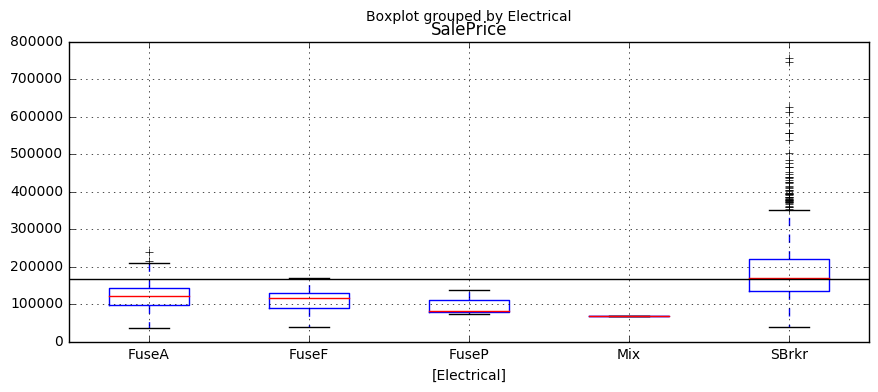

In [37]:
_ = train[['SalePrice','Electrical']].boxplot(by=['Electrical'], figsize=(10,4))
_ = plt.plot(np.arange(100),[167500]*100, c='k')

In [38]:
_ = full.set_value(full.Electrical.isnull(),'Electrical','SBrkr')
_ = train.set_value(train.Electrical.isnull(),'Electrical','SBrkr')

In [39]:
full[['Exterior1st','Exterior2nd','ExterQual','ExterCond']].head()

,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,VinylSd,VinylSd,Gd,TA
1,MetalSd,MetalSd,TA,TA
2,VinylSd,VinylSd,Gd,TA
3,Wd Sdng,Wd Shng,TA,TA
4,VinylSd,VinylSd,Gd,TA


In [40]:
full[full.Exterior1st.isnull()][['Exterior1st','Exterior2nd','ExterQual','ExterCond','RoofStyle','RoofMatl']]

,Exterior1st,Exterior2nd,ExterQual,ExterCond,RoofStyle,RoofMatl
2151,NaN,NaN,TA,TA,Flat,Tar&Grv


In [41]:
full[(full.ExterQual=='TA')&(full.ExterCond=='TA')&(full.RoofStyle=='Flat')&(full.RoofMatl=='Tar&Grv')][['Exterior1st','Exterior2nd','ExterQual','ExterCond','RoofStyle','RoofMatl']]

,Exterior1st,Exterior2nd,ExterQual,ExterCond,RoofStyle,RoofMatl
457,Plywood,Plywood,TA,TA,Flat,Tar&Grv
588,Wd Sdng,Wd Sdng,TA,TA,Flat,Tar&Grv
828,Plywood,Plywood,TA,TA,Flat,Tar&Grv
934,Wd Sdng,Wd Sdng,TA,TA,Flat,Tar&Grv
954,WdShing,Plywood,TA,TA,Flat,Tar&Grv
1000,BrkComm,Brk Cmn,TA,TA,Flat,Tar&Grv
1593,Plywood,CBlock,TA,TA,Flat,Tar&Grv
1795,Wd Sdng,Wd Sdng,TA,TA,Flat,Tar&Grv
2146,Plywood,Plywood,TA,TA,Flat,Tar&Grv
2151,NaN,NaN,TA,TA,Flat,Tar&Grv


In [42]:
_ = full.set_value(full.Exterior1st.isnull(),['Exterior1st','Exterior2nd'],'Plywood')
_ = test.set_value(test.Exterior1st.isnull(),['Exterior1st','Exterior2nd'],'Plywood')

In [43]:
full.Fence.value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [44]:
_ = full.set_value(full.Fence.isnull(),'Fence','NA')
_ = train.set_value(train.Fence.isnull(),'Fence','NA')
_ = test.set_value(test.Fence.isnull(),'Fence','NA')

In [45]:
full.FireplaceQu.value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

In [46]:
full[full.FireplaceQu.isnull()][['FireplaceQu','Fireplaces']].drop_duplicates()

,FireplaceQu,Fireplaces
0,NaN,0


In [47]:
_ = full.set_value(full.FireplaceQu.isnull(), 'FireplaceQu', 'NA')
_ = train.set_value(train.FireplaceQu.isnull(), 'FireplaceQu', 'NA')
_ = test.set_value(test.FireplaceQu.isnull(), 'FireplaceQu', 'NA')

In [48]:
full.Functional.value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [49]:
_ = full.set_value(full.Functional.isnull(),['Functional'],'Typ')
_ = test.set_value(test.Functional.isnull(),['Functional'],'Typ')
full[full.KitchenQual.isnull()][['KitchenAbvGr','KitchenQual']]

,KitchenAbvGr,KitchenQual
1555,1,NaN


In [50]:
full[full.KitchenAbvGr==1].KitchenQual.value_counts()

TA    1372
Gd    1146
Ex     205
Fa      61
Name: KitchenQual, dtype: int64

In [51]:
_ = full.set_value(full.KitchenQual.isnull(),['KitchenQual'],'TA')
_ = test.set_value(test.KitchenQual.isnull(),['KitchenQual'],'TA')
full[['LotFrontage','LotArea','LotShape','LotConfig']].head()

,LotFrontage,LotArea,LotShape,LotConfig
0,65.0,8450,Reg,Inside
1,80.0,9600,Reg,FR2
2,68.0,11250,IR1,Inside
3,60.0,9550,IR1,Corner
4,84.0,14260,IR1,FR2


In [52]:
full[full.LotFrontage.isnull()][['LotFrontage','LotArea','LotShape','LotConfig']].head()

,LotFrontage,LotArea,LotShape,LotConfig
7,NaN,10382,IR1,Corner
12,NaN,12968,IR2,Inside
14,NaN,10920,IR1,Corner
16,NaN,11241,IR1,CulDSac
24,NaN,8246,IR1,Inside


In [53]:
#full[full.LotFrontage.isnull()].LotFrontage = full[['LotFrontage','LotShape','LotConfig']].groupby(['LotShape','LotConfig']).apply(lambda x : x.fillna(np.mean(x).astype(int)))

lot_lookup = full[['LotFrontage','LotShape','LotConfig']].groupby(['LotShape','LotConfig']).agg(np.mean).astype(int).reset_index()
LotFrontage_lookup = lot_lookup.pivot('LotShape','LotConfig','LotFrontage')
LotFrontage_lookup = LotFrontage_lookup.fillna(0)
LotFrontage_lookup

LotConfig,Corner,CulDSac,FR2,FR3,Inside
LotShape,,,,,
IR1,93.0,57.0,72.0,87.0,72.0
IR2,96.0,49.0,41.0,0.0,86.0
IR3,167.0,113.0,0.0,0.0,79.0
Reg,76.0,33.0,60.0,73.0,65.0


In [54]:
lot_fet = full[full.LotFrontage.isnull()][['LotShape','LotConfig']].drop_duplicates()
for LotShape,LotConfig in zip(lot_fet.LotShape,lot_fet.LotConfig):
    val = LotFrontage_lookup.loc[LotShape][LotConfig]
    full.set_value((full.LotShape==LotShape)&(full.LotConfig==LotConfig)&(full.LotFrontage.isnull()),'LotFrontage',val)
    train.set_value((train.LotShape==LotShape)&(train.LotConfig==LotConfig)&(train.LotFrontage.isnull()),'LotFrontage',val)
    test.set_value((test.LotShape==LotShape)&(test.LotConfig==LotConfig)&(test.LotFrontage.isnull()),'LotFrontage',val)

In [55]:
full[full.MSZoning.isnull()][['MSZoning','Neighborhood','Condition1','Condition2']].drop_duplicates()

,MSZoning,Neighborhood,Condition1,Condition2
1915,NaN,IDOTRR,Norm,Norm
2904,NaN,Mitchel,Artery,Norm


In [56]:
full[(full.Neighborhood=='IDOTRR')&(full.Condition1=='Norm')&(full.Condition2=='Norm')].MSZoning.value_counts()

RM         57
C (all)    16
Name: MSZoning, dtype: int64

In [57]:
full[(full.Neighborhood=='Mitchel')&(full.Condition1=='Artery')&(full.Condition2=='Norm')].MSZoning.value_counts()

RL    2
Name: MSZoning, dtype: int64

In [58]:
_ = full.set_value((full.MSZoning.isnull())&(full.Neighborhood=='IDOTRR'),'MSZoning','RM')
_ = test.set_value((test.MSZoning.isnull())&(test.Neighborhood=='IDOTRR'),'MSZoning','RM')

_ = full.set_value((full.MSZoning.isnull())&(full.Neighborhood=='Mitchel'),'MSZoning','RL')
_ = test.set_value((test.MSZoning.isnull())&(test.Neighborhood=='Mitchel'),'MSZoning','RL')

In [59]:
full[(full.MasVnrType.isnull())|(full.MasVnrArea.isnull())][['MasVnrType','MasVnrArea']].drop_duplicates()

,MasVnrType,MasVnrArea
234,NaN,NaN
2610,NaN,198.0


In [60]:
full[full.MasVnrArea==198].MasVnrType.value_counts()

Stone      3
BrkFace    2
Name: MasVnrType, dtype: int64

In [61]:
_ = full.set_value(full.MasVnrArea.isnull(),['MasVnrType','MasVnrArea'],['None',0])
_ = train.set_value(train.MasVnrArea.isnull(),['MasVnrType','MasVnrArea'],['None',0])
_ = test.set_value(test.MasVnrArea.isnull(),['MasVnrType','MasVnrArea'],['None',0])

_ = full.set_value(full.MasVnrType.isnull(),'MasVnrType','Stone')
_ = train.set_value(train.MasVnrType.isnull(),'MasVnrType','Stone')
_ = test.set_value(test.MasVnrType.isnull(),'MasVnrType','Stone')

In [62]:
full.MiscFeature.value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [63]:
_ = full.set_value(full.MiscFeature.isnull(),'MiscFeature','NA')
_ = train.set_value(train.MiscFeature.isnull(),'MiscFeature','NA')
_ = test.set_value(test.MiscFeature.isnull(),'MiscFeature','NA')
full[full.PoolQC.isnull()][['PoolQC','PoolArea']].drop_duplicates()

,PoolQC,PoolArea
0,NaN,0
2420,NaN,368
2503,NaN,444
2599,NaN,561


In [64]:
full[(full.PoolArea>=300)&(full.PoolArea<=600)][['PoolQC','PoolArea']].drop_duplicates()

,PoolQC,PoolArea
197,Ex,512
1170,Gd,576
1182,Ex,555
1298,Gd,480
1386,Fa,519
2420,NaN,368
2503,NaN,444
2599,NaN,561


In [65]:
_ = full.set_value((full.PoolQC.isnull())&(full.PoolArea==0),'PoolQC','NA')
_ = train.set_value((train.PoolQC.isnull())&(train.PoolArea==0),'PoolQC','NA')
_ = test.set_value((test.PoolQC.isnull())&(test.PoolArea==0),'PoolQC','NA')

_ = full.set_value(full.PoolQC.isnull(),'PoolQC','Gd')
_ = train.set_value(train.PoolQC.isnull(),'PoolQC','Gd')
_ = test.set_value(test.PoolQC.isnull(),'PoolQC','Gd')

In [66]:
full[full.SaleType.isnull()][['SaleType','SaleCondition']]

,SaleType,SaleCondition
2489,NaN,Normal


In [67]:
full[full.SaleCondition=='Normal'].SaleType.value_counts()

WD       2314
COD        39
ConLD      21
CWD        10
ConLw       7
ConLI       5
Con         4
Oth         1
Name: SaleType, dtype: int64

In [68]:
_ = full.set_value(full.SaleType.isnull(),'SaleType','WD')
_ = train.set_value(train.SaleType.isnull(),'SaleType','WD')
_ = test.set_value(test.SaleType.isnull(),'SaleType','WD')

In [69]:
full.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [70]:
_ = full.set_value(full.Utilities.isnull(),'Utilities','AllPub')
_ = train.set_value(train.Utilities.isnull(),'Utilities','AllPub')
_ = test.set_value(test.Utilities.isnull(),'Utilities','AllPub')

In [71]:
full.isnull().sum().sum(), train.isnull().sum().sum(), test.isnull().sum().sum()

(1459, 0, 0)

Observe SalePrice

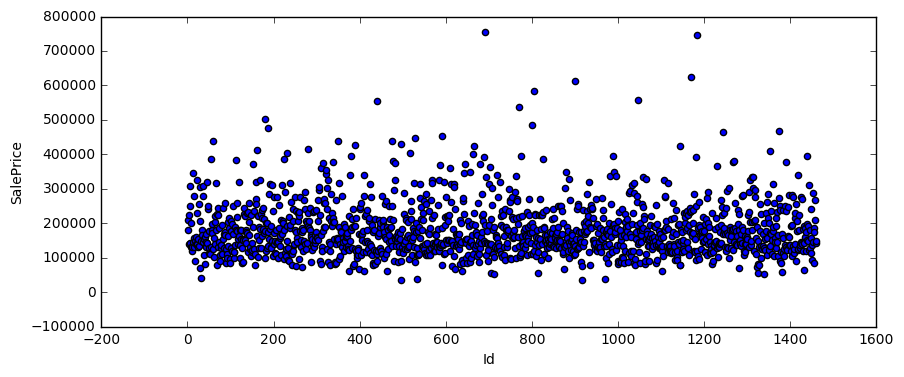

In [72]:
_ = train[['Id','SalePrice']].plot(kind='scatter', x='Id',y='SalePrice', figsize=(10,4))

Observe LotArea

(1300, 215245)

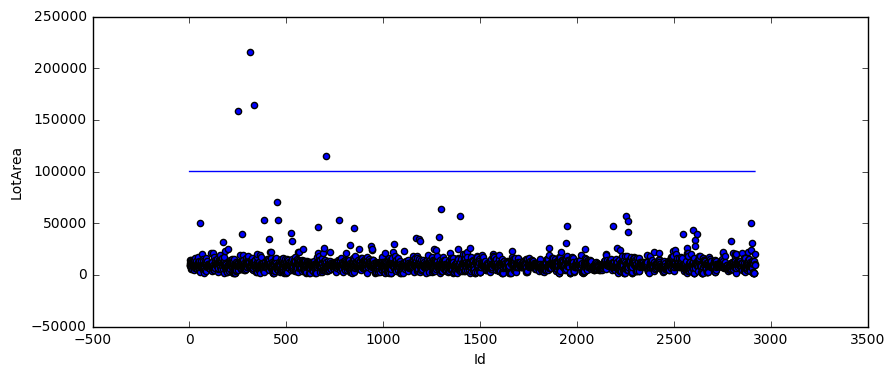

In [73]:
_ = full[['Id','LotArea']].plot(kind='scatter', x='Id',y='LotArea', figsize=(10,4))
_ = plt.plot(full.Id,[100000]*len(full.Id))
train.LotArea.min(),train.LotArea.max()

#_ = full[['Id','TotalArea']].plot(kind='scatter', x='Id',y='TotalArea', figsize=(10,4))
#_ = plt.plot(full.Id,[100000]*len(full.Id))
#train.TotalArea.min(),train.TotalArea.max()

In [74]:
_ = full.drop((full[full.LotArea>=100000]).index, axis=0, inplace=True)
_ = train.drop((train[train.LotArea>=100000]).index, axis=0, inplace=True)

#_ = full.drop((full[full.TotalArea>=100000]).index, axis=0, inplace=True)
#_ = train.drop((train[train.TotalArea>=100000]).index, axis=0, inplace=True)

continuous features to rescale
------------------------------

In [75]:
cont_features=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

In [76]:
train_log = train.copy()
test_log = test.copy()

for col in cont_features:
    if col=='SalePrice':
        None
        train_log[col] = np.log1p(train_log[col])
    else:
        train_log[col] = np.log1p(train_log[col])
        test_log[col] = np.log1p(test_log[col])

In [77]:
train_log[cont_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,12.247699
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,12.109016
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,12.317171
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,11.849405
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12.429220


In [78]:
train_log.shape, test_log.shape

((1456, 81), (1459, 80))

Dummy variables to add
----------------------

In [79]:
full = pd.concat([train_log,test_log], ignore_index=True)

In [80]:
full.drop(cont_features, axis=1).head()

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSSubClass,MSZoning,MasVnrType,MiscFeature,MoSold,Neighborhood,OverallCond,OverallQual,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,TotRmsAbvGrd,Utilities,YearBuilt,YearRemodAdd,YrSold
0,NA,3,1Fam,TA,No,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NA,NA,0,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,2003.0,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,Inside,Reg,60,RL,BrkFace,NA,2,CollgCr,5,7,Y,NA,CompShg,Gable,Normal,WD,Pave,8,AllPub,2003,2003,2008
1,NA,3,1Fam,TA,Gd,ALQ,Unf,0.0,1.0,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,NA,TA,1,CBlock,2,Typ,2.0,TA,RFn,TA,Attchd,1976.0,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,FR2,Reg,20,RL,None,NA,5,Veenker,8,6,Y,NA,CompShg,Gable,Normal,WD,Pave,6,AllPub,1976,1976,2007
2,NA,3,1Fam,TA,Mn,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,2.0,TA,RFn,TA,Attchd,2001.0,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,Inside,IR1,60,RL,BrkFace,NA,9,CollgCr,5,7,Y,NA,CompShg,Gable,Normal,WD,Pave,6,AllPub,2001,2002,2008
3,NA,3,1Fam,Gd,No,ALQ,Unf,1.0,0.0,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,NA,Gd,1,BrkTil,1,Typ,3.0,TA,Unf,TA,Detchd,1998.0,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,Corner,IR1,70,RL,None,NA,2,Crawfor,5,7,Y,NA,CompShg,Gable,Abnorml,WD,Pave,7,AllPub,1915,1970,2006
4,NA,4,1Fam,TA,Av,GLQ,Unf,1.0,0.0,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,NA,TA,1,PConc,2,Typ,3.0,TA,RFn,TA,Attchd,2000.0,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,FR2,IR1,60,RL,BrkFace,NA,12,NoRidge,5,8,Y,NA,CompShg,Gable,Normal,WD,Pave,9,AllPub,2000,2000,2008


In [81]:
full_dummy = pd.get_dummies(full)

In [82]:
full_dummy.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_NA,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1.0,0.0,5.017280,0.000000,0,2,6.308098,2.0,2003.0,7.444833,1,1,1,9.042040,4.189655,0.0,60,5.283204,0.0,2,4.127134,5,7,0.0,12.247699,0.0,8,6.753438,0.000000,2003,2003,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0.0,1.0,5.652489,0.000000,1,2,6.133398,2.0,1976.0,7.141245,0,2,1,9.169623,4.394449,0.0,20,0.000000,0.0,5,0.000000,8,6,0.0,12.109016,0.0,6,7.141245,5.700444,1976,1976,2007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1.0,0.0,6.075346,0.000000,1,2,6.411818,2.0,2001.0,7.488294,1,3,1,9.328212,4.234107,0.0,60,5.093750,0.0,9,3.761200,5,7,0.0,12.317171,0.0,6,6.825460,0.000000,2001,2002,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1.0,0.0,6.293419,5.609472,1,1,6.466145,3.0,1998.0,7.448916,0,4,1,9.164401,4.110874,0.0,70,0.000000,0.0,2,3.583519,5,7,0.0,11.849405,0.0,7,6.629363,0.000000,1915,1970,2006,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1.0,0.0,6.196444,0.000000,1,2,6.729824,3.0,2000.0,7.695758,1,5,1,9.565284,4.442651,0.0,60,5.860786,0.0,12,4.442651,5,8,0.0,12.429220,0.0,9,7.044033,5.262690,2000,2000,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [83]:
full_dummy.shape

(2915, 304)

In [84]:
full_dummy.drop(cont_features, axis=1).head()

,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,GarageYrBlt,HalfBath,Id,KitchenAbvGr,MSSubClass,MoSold,OverallCond,OverallQual,TotRmsAbvGrd,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_NA,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,3,1.0,0.0,0,2,2.0,2003.0,1,1,1,60,2,5,7,8,2003,2003,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,3,0.0,1.0,1,2,2.0,1976.0,0,2,1,20,5,8,6,6,1976,1976,2007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,3,1.0,0.0,1,2,2.0,2001.0,1,3,1,60,9,5,7,6,2001,2002,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,1.0,0.0,1,1,3.0,1998.0,0,4,1,70,2,5,7,7,1915,1970,2006,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,4,1.0,0.0,1,2,3.0,2000.0,1,5,1,60,12,5,8,9,2000,2000,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Create Train Input/Output combination
-------------------------------------

In [85]:
X_train = full_dummy[full_dummy.SalePrice.notnull()].drop('SalePrice', axis=1)
y_train = full_dummy[full_dummy.SalePrice.notnull()][['SalePrice']]
X_test = full_dummy[full_dummy.SalePrice.isnull()].drop('SalePrice', axis=1)

In [86]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_Grvl,Alley_NA,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1.0,0.0,5.017280,0.000000,0,2,6.308098,2.0,2003.0,7.444833,1,1,1,9.042040,4.189655,0.0,60,5.283204,0.0,2,4.127134,5,7,0.0,0.0,8,6.753438,0.000000,2003,2003,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0.0,1.0,5.652489,0.000000,1,2,6.133398,2.0,1976.0,7.141245,0,2,1,9.169623,4.394449,0.0,20,0.000000,0.0,5,0.000000,8,6,0.0,0.0,6,7.141245,5.700444,1976,1976,2007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1.0,0.0,6.075346,0.000000,1,2,6.411818,2.0,2001.0,7.488294,1,3,1,9.328212,4.234107,0.0,60,5.093750,0.0,9,3.761200,5,7,0.0,0.0,6,6.825460,0.000000,2001,2002,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1.0,0.0,6.293419,5.609472,1,1,6.466145,3.0,1998.0,7.448916,0,4,1,9.164401,4.110874,0.0,70,0.000000,0.0,2,3.583519,5,7,0.0,0.0,7,6.629363,0.000000,1915,1970,2006,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1.0,0.0,6.196444,0.000000,1,2,6.729824,3.0,2000.0,7.695758,1,5,1,9.565284,4.442651,0.0,60,5.860786,0.0,12,4.442651,5,8,0.0,0.0,9,7.044033,5.262690,2000,2000,2008,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [87]:
y_train.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


In [88]:
X_train.shape, y_train.shape, X_test.shape

((1456, 303), (1456, 1), (1459, 303))

SVR
---

MinMax scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled

array([[ 0.35583912,  0.88441957,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.50275266,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.38312336,  0.88624543,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ..., 
       [ 0.47987988,  0.92359244,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.44310371,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5009487 ,  0.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [91]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param = {'C':[.1,1,10,100,200,500] ,'gamma':[.0001,.001,.01,.1]}
svr_grid = GridSearchCV(SVR(), param_grid=param ,cv=5).fit(X_train_scaled ,y_train.values.ravel())

print("grid search score : ",svr_grid.score(X_train_scaled, y_train.values.ravel()))
print("grid search best score : ",svr_grid.best_score_)
print("grid search best parameter : ",svr_grid.best_params_)

grid search score :  0.919611706537
grid search best score :  0.889538985696
grid search best parameter :  {'C': 200, 'gamma': 0.0001}


In [92]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

svr = SVR(C=200, gamma=.0001)
svr_score = cross_val_score(svr, X_train_scaled, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
print("SVR RMSE : ", svr_score.mean())

SVR RMSE :  -0.0176021170258


Linear Regression
-----------------

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear regression RMSE : ",lin_scores.mean())

Linear regression RMSE :  -0.0213634547968


Ridge Regression
----------------

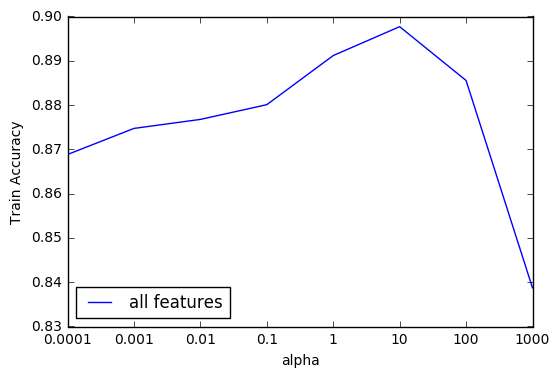

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha = [.0001,.001,.01,.1,1,10,100,1000]
ridge_score = []
ridge_score_imp_features = []

for a in alpha:
    ridge_reg = Ridge(alpha=a)
    ridge_score.append(cross_val_score(ridge_reg, X_train, y_train, cv=5))
    
ridge_score = np.mean(ridge_score, axis=1)

_ = plt.plot(np.arange(len(alpha)),ridge_score, label='all features')
_ = plt.xticks(np.arange(len(alpha)),alpha)
_ = plt.legend(loc=3)
_ = plt.xlabel("alpha")
_ = plt.ylabel('Train Accuracy')

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10)
ridge_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5)
ridge_rmse = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print("Ridge regression mean score : ",ridge_scores.mean())
print("Ridge regression RMSE : ",ridge_rmse.mean())

Ridge regression mean score :  0.897704521415
Ridge regression RMSE :  -0.0162540693561


Lasso Regression
----------------

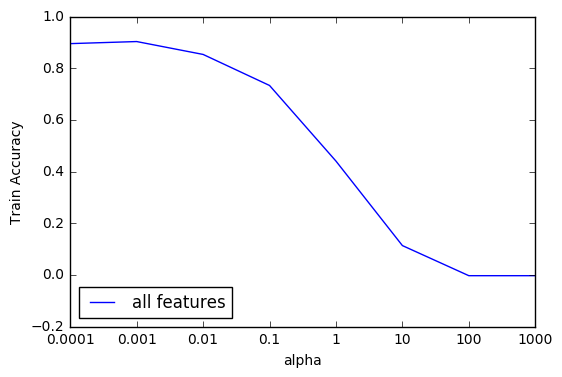

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = [.0001,.001,.01,.1,1,10,100,1000]
lasso_score = []

param = {'alpha':[.0001,.001,.01,.1,1,10,100,1000]}

for a in alpha:
    lasso = Lasso(alpha=a)
    lasso_score.append(cross_val_score(lasso,X_train, y_train, cv=5))

lasso_score = np.mean(lasso_score, axis=1)

_ = plt.plot(np.arange(len(alpha)),lasso_score, label='all features')
_ = plt.xticks(np.arange(len(alpha)),alpha)
_ = plt.legend(loc=3)
_ = plt.xlabel("alpha")
_ = plt.ylabel('Train Accuracy')

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.0007, max_iter=10000)
lasso_scores = cross_val_score(lasso_reg, X_train, y_train, cv=5)
lasso_RMSE = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
print("Lasso regression mean score : ",lasso_scores.mean())
print("Lasso regression RMSE : ",lasso_RMSE.mean())

Lasso regression mean score :  0.904740046924
Lasso regression RMSE :  -0.0151550284835


In [98]:
lasso_reg = Lasso(alpha=.0007, max_iter=10000).fit(X_train,y_train)
#y_train_pred_lasso = pd.DataFrame({'Id':X_test.Id.values.ravel(),
#                             'SalePrice': np.expm1(lasso_reg.predict(X_test))},
#                            index=X_test.index
#                           )
#y_train_pred_lasso.to_csv("Lasso_submission.csv",index=False)

Decision Tree Regressior
------------------------

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param ={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'min_samples_leaf':[1, 5,10,20,50,100,200,400]}

dtree_grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param, cv=5).fit(X_train, y_train)

print("Best parameter : ", dtree_grid.best_params_)
print("Best Score : ",dtree_grid.best_score_)
print(dtree_grid.best_estimator_)

Best parameter :  {'min_samples_leaf': 10, 'max_depth': 11}
Best Score :  0.780705036024
DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeRegressor(max_depth=11, min_samples_leaf=10)
dtree_score = cross_val_score(dtree, X_train, y_train, cv=5)
dtree_RMSE = cross_val_score(dtree, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Decision tree regression mean score : ",dtree_score.mean())
print("Decision tree regression RMSE : ",dtree_RMSE.mean())

Decision tree regression mean score :  0.78082990004
Decision tree regression RMSE :  -0.0347607246504


Random forest Regression
------------------------

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param = {'max_depth':[1,3,5,7,9], 'n_estimators':[10,100,200,400]}


rtree_grid = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param, cv=5).fit(X_train, y_train.values.ravel())

print("Best parameter : ", rtree_grid.best_params_)
print("Best Score : ",rtree_grid.best_score_)
print(rtree_grid.best_estimator_)

Best parameter :  {'max_depth': 9, 'n_estimators': 400}
Best Score :  0.867611304459
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)


In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rtree = RandomForestRegressor(max_depth=9, n_estimators=400)
r_tree_scores = cross_val_score(rtree, X_train, y_train.values.ravel(), cv=5)
r_tree_RMSE = cross_val_score(rtree, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')

print("Random forest regression mean score : ",r_tree_scores.mean())
print("Random forest regression RMSE : ",r_tree_RMSE.mean())

Random forest regression mean score :  0.868001951604
Random forest regression RMSE :  -0.0209780752553


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rtree = RandomForestRegressor(max_depth=9, n_estimators=400).fit(X_train, y_train.values.ravel())
pred_lasso_rtree =np.expm1(rtree.predict(X_train))
print("R2 score",r2_score(np.expm1(y_train.values.ravel()),pred_lasso_rtree))
print("mean_squared_error :",mean_squared_error(np.expm1(y_train.values.ravel()),pred_lasso_rtree))

R2 score 0.971561247112
mean_squared_error : 178599702.45


In [104]:
from sklearn.metrics import r2_score, mean_squared_error
pred_lasso_rtree = np.expm1(lasso_reg.predict(X_train))
print("R2 score",r2_score(np.expm1(y_train.values.ravel()),pred_lasso_rtree))
print("mean_squared_error :",mean_squared_error(np.expm1(y_train.values.ravel()),pred_lasso_rtree))

R2 score 0.906057497672
mean_squared_error : 589973232.282


In [105]:
from sklearn.metrics import r2_score, mean_squared_error
pred_lasso_rtree = np.expm1(rtree.predict(X_train))*.5 + np.expm1(lasso_reg.predict(X_train))*.5
print("R2 score",r2_score(np.expm1(y_train.values.ravel()),pred_lasso_rtree))
print("mean_squared_error :",mean_squared_error(np.expm1(y_train.values.ravel()),pred_lasso_rtree))

R2 score 0.949994598025
mean_squared_error : 314041545.665


In [106]:

y_test_pred_rtree = pd.DataFrame({'Id':test.Id.values.ravel(),
                             'SalePrice': (np.expm1(rtree.predict(X_test))*.5 + np.expm1(lasso_reg.predict(X_test))*.5)
                           },                            
                            index=X_test.index
                           )
y_test_pred_rtree.to_csv("Rtree_lasso_submission.csv",index=False)